# Projet 5 :
# Optimisez la gestion des données d'une boutique avec R ou Python

## Sommaire <a id='sommaire'></a>
<ol> <li><a href="#erp">Préparation des données</a></li>
    <ol>
        <li><a href="#erp">Préparation données fichier erp</a></li> 
        <li><a href="#liaison">Préparation données fichier liaison</a></li> 
        <li><a href="#web">Préparation données fichier web</a></li> 
        <li><a href="#jointure">Jointure des 3 fichiers</a></li> 
        <li><a href="#ca">Chiffre d'affaires</a></li> 
    </ol>
    <li><a href="#analyse_univariee">Analyse univariée</a></li>
        <ol>
        <li><a href="#analyse_univariee">Analyse univariée de la variable prix</a></li> 
        <li><a href="#test_normal">Tests de normalité</a></li> 
        <li><a href="#synthese">Synthèse analyse univariée</a></li>
        <li><a href="#fonction">Création de fonctions</a></li>
        <li><a href="#conclusion">Conclusion finale</a></li>
    </ol>
</ol>

# 1. Préparation des données

## Import des librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings

folder='D:/Data_Analyst_Projet/Projet 5/Donnees/Donnees analyse python/'

## Import des fichiers

In [3]:
warnings.simplefilter("ignore")
erp=pd.read_excel(folder+'erp.xlsx')
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
web=pd.read_excel(folder+'web.xlsx')
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
liaison=pd.read_excel(folder+'liaison.xlsx')
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<a id='erp' ></a>
## Fichier erp <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [6]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### Renommage des colonnes

In [7]:
erp.rename(columns={'product_id' : 'id_produit',
                    'onsale_web' : 'vente_web',
                    'price' : 'prix',
                    'stock_quantity' : 'quantite_stock',
                    'stock_status' : 'status_stock'}, inplace=True)

In [8]:
erp.head()

,id_produit,vente_web,prix,quantite_stock,status_stock
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### Description du fichier
Nombre de lignes, type des variables, données manquantes, indicateurs clés

In [9]:
erp.shape

(825, 5)

In [10]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produit      825 non-null    int64  
 1   vente_web       825 non-null    int64  
 2   prix            825 non-null    float64
 3   quantite_stock  825 non-null    int64  
 4   status_stock    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [11]:
erp.describe(include='all')

,id_produit,vente_web,prix,quantite_stock,status_stock
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


### Modification des types de variable

In [12]:
erp['vente_web']=erp['vente_web'].astype('category')
erp['status_stock']=erp['status_stock'].astype('category')

In [13]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id_produit      825 non-null    int64   
 1   vente_web       825 non-null    category
 2   prix            825 non-null    float64 
 3   quantite_stock  825 non-null    int64   
 4   status_stock    825 non-null    category
dtypes: category(2), float64(1), int64(2)
memory usage: 21.3 KB


### Traitements des valeurs nulles

In [14]:
erp[erp.isnull().any(axis=1)]

,id_produit,vente_web,prix,quantite_stock,status_stock


In [15]:
erp.isnull().sum()

id_produit        0
vente_web         0
prix              0
quantite_stock    0
status_stock      0
dtype: int64

Pas de valeurs nulles, cela vient confirmer ce qu'on avait vu avec la méthode info()

### Traitements des doublons

In [16]:
erp[erp.duplicated(subset='id_produit')]

,id_produit,vente_web,prix,quantite_stock,status_stock


### Part des ventes web apparentes

In [17]:
erp['vente_web'].value_counts()

1    717
0    108
Name: vente_web, dtype: int64

717 références vendues sur le web et 108 non vendues sur le web.

Nous vérifierons si cela est vrai avec le fichier de liaison et web, si les produits affichés vendus sur le web sont bien vendus sur le web, et si ceux affichés non vendus sont bien non vendus sur le web.

### Vérification de la cohérence entre quantite_stock et status_stock

In [18]:
erp['status_stock'].value_counts()

instock       638
outofstock    187
Name: status_stock, dtype: int64

In [19]:
erp[erp['quantite_stock']==0].count()

id_produit        188
vente_web         188
prix              188
quantite_stock    188
status_stock      188
dtype: int64

1 erreur : 1 produit est considéré en stock alors que sa quantité réelle en stock est nulle.

Nous allons modifier cela en passant le status_stock à outofstock si quantite_stock=0.

In [20]:
erp.loc[(erp['quantite_stock']==0) & (erp['status_stock']=='instock'), :]

,id_produit,vente_web,prix,quantite_stock,status_stock
443,4954,1,25.0,0,instock


In [21]:
erp.loc[(erp['quantite_stock']==0) & (erp['status_stock']=='instock'), 'status_stock'] = 'outofstock'

In [22]:
erp.loc[(erp['quantite_stock']==0) & (erp['status_stock']=='instock'), :].count()

id_produit        0
vente_web         0
prix              0
quantite_stock    0
status_stock      0
dtype: int64

<a id='liaison' ></a>
## Fichier liaison <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [23]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### Renommage colonne

In [24]:
liaison.rename(columns={'product_id' : 'id_produit'}, inplace=True)

### Description fichier

In [25]:
liaison.shape

(825, 2)

In [26]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_produit  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [27]:
liaison.describe(include='all')

,id_produit,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


On a les 825 références de l'ERP représentées avec 734 correspondances dans web, soit 91 valeurs nulles pour id_web

In [28]:
liaison.isnull().sum()

id_produit     0
id_web        91
dtype: int64

In [29]:
liaison[liaison.isnull().any(axis=1)]

,id_produit,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


### Placement des produits erp sans correspondance dans une variable

In [30]:
produit_erp_sans_correspondance=liaison[liaison.isnull().any(axis=1)]['id_produit'].reset_index(drop=True)
produit_erp_sans_correspondance

0     4055
1     4090
2     4092
3     4195
4     4209
      ... 
86    7196
87    7200
88    7201
89    7203
90    7204
Name: id_produit, Length: 91, dtype: int64

Nous allons supprimer ces valeurs nulles, car ces références ne trouvent pas de correspondance.

### Suppression des lignes sans correspondance

In [31]:
liaison.dropna(axis=0, how='any', inplace=True)

In [32]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_produit  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


### Des erreurs à modifier pour la conversion

In [33]:
# on la supprime car cette référence n'existe pas dans web
liaison.drop(liaison[liaison['id_web']=='14680-1'].index, inplace=True)

In [34]:
liaison.loc[liaison['id_web']=='bon-cadeau-25-euros', 'id_web']=19823
liaison.loc[liaison['id_web']=='13127-1', 'id_web']=13128

### Conversion en entier de id_web
Cela est rendu possible grâce aux modifications faites précédemment.

In [35]:
liaison['id_web']=liaison['id_web'].astype('int64', errors='raise')

In [36]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_produit  733 non-null    int64
 1   id_web      733 non-null    int64
dtypes: int64(2)
memory usage: 17.2 KB


In [37]:
liaison.describe()

,id_produit,id_web
count,733.000000,733.00000
mean,5038.739427,14491.86221
std,786.311710,2975.99534
min,3847.000000,38.00000
25%,4287.000000,14371.00000
50%,4862.000000,15361.00000
75%,5712.000000,15870.00000
max,7338.000000,19823.00000


<a id='web' ></a>
## Fichier web <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [38]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [39]:
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

### Supression des colonnes inutiles

In [40]:
web.drop(columns=['virtual', 'downloadable', 'rating_count', 'average_rating',
        'tax_status', 'tax_class', 'post_author',
       'post_date_gmt', 'post_content', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_mime_type', 'comment_count'], inplace=True)

In [41]:
web.head()

,sku,total_sales,post_date,post_title,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product


### Ces produits n'ont pas de références mais ont d'autres infos, on les supprime car aucune vente

In [42]:
web.loc[(web['sku'].isnull()) & (~web['total_sales'].isnull()), :]

,sku,total_sales,post_date,post_title,post_type
470,NaN,0.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,product
471,NaN,0.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,product


### Renommage des colonnes 

In [43]:
web.rename(columns={'sku' : 'id_web', 'total_sales' : 'total_vente',
                    'post_date' : 'date_creation', 'post_title' : 'description'}, inplace=True)

### Exploration fichier

In [44]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_web         1428 non-null   object        
 1   total_vente    1430 non-null   float64       
 2   date_creation  1430 non-null   datetime64[ns]
 3   description    1430 non-null   object        
 4   post_type      1430 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 59.2+ KB


### Valeurs nulles

In [45]:
web.isnull().sum()

id_web           85
total_vente      83
date_creation    83
description      83
post_type        83
dtype: int64

In [46]:
web[web.isnull().any(axis=1)]

,id_web,total_vente,date_creation,description,post_type
178,NaN,NaN,NaT,NaN,NaN
179,NaN,NaN,NaT,NaN,NaN
227,NaN,NaN,NaT,NaN,NaN
230,NaN,NaN,NaT,NaN,NaN
231,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...
792,NaN,NaN,NaT,NaN,NaN
793,NaN,NaN,NaT,NaN,NaN
794,NaN,NaN,NaT,NaN,NaN
795,NaN,NaN,NaT,NaN,NaN


### Suppression des valeurs nulles

In [47]:
web.dropna(axis=0, how='any', inplace=True)

In [48]:
web.head()

,id_web,total_vente,date_creation,description,post_type
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,Bon cadeau de 25€,product
1,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product


In [49]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_web         1428 non-null   object        
 1   total_vente    1428 non-null   float64       
 2   date_creation  1428 non-null   datetime64[ns]
 3   description    1428 non-null   object        
 4   post_type      1428 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 66.9+ KB


### Suppression des type attachment
Cela correspond aux photos associées aux références, ce n'est pas utile pour l'analyse.

In [50]:
web['post_type'].value_counts()

product       714
attachment    714
Name: post_type, dtype: int64

In [51]:
web.drop(web[web['post_type']=='attachment'].index, inplace=True)

In [52]:
web.drop(columns='post_type', inplace=True)

### Modification du type de 'id_web'

In [53]:
web.loc[web['id_web']=='bon-cadeau-25-euros', 'id_web']=19823
web.loc[web['id_web']=='13127-1', 'id_web']=13128

In [54]:
web['id_web']=web['id_web'].astype('int64', errors='raise')

### Modification du type de 'total_vente'

In [55]:
web['total_vente']=web['total_vente'].astype('int64', errors='raise')

In [56]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_web         714 non-null    int64         
 1   total_vente    714 non-null    int64         
 2   date_creation  714 non-null    datetime64[ns]
 3   description    714 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 27.9+ KB


In [57]:
web.describe()

,id_web,total_vente
count,714.000000,714.000000
mean,14485.224090,4.012605
std,3012.431806,8.518183
min,38.000000,0.000000
25%,14367.250000,0.000000
50%,15380.000000,1.000000
75%,15880.750000,4.000000
max,19823.000000,96.000000


<a id='jointure'></a>
## Jointure des 3 fichiers <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>
Pour calculer le chiffre d'affaires

In [58]:
erp.head()

,id_produit,vente_web,prix,quantite_stock,status_stock
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [59]:
web.head()

,id_web,total_vente,date_creation,description
0,19823,10,2018-06-01 13:53:46,Bon cadeau de 25€
1,15298,6,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018
2,15296,0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
3,15300,0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...
4,19814,3,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...


In [60]:
jointure_inter=pd.merge(erp, liaison, how='left', on='id_produit')

In [61]:
jointure_inter.head()

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web
0,3847,1,24.2,0,outofstock,15298.0
1,3849,1,34.3,0,outofstock,15296.0
2,3850,1,20.8,0,outofstock,15300.0
3,4032,1,14.1,0,outofstock,19814.0
4,4039,1,46.0,0,outofstock,19815.0


In [62]:
df_global=pd.merge(jointure_inter, web, how='left', on='id_web')

In [63]:
df_global.head()

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web,total_vente,date_creation,description
0,3847,1,24.2,0,outofstock,15298.0,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,1,34.3,0,outofstock,15296.0,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,1,20.8,0,outofstock,15300.0,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,1,14.1,0,outofstock,19814.0,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,1,46.0,0,outofstock,19815.0,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017


In [64]:
# correspondance entre id_produit et id_web mais aucune info liée au web
df_global.loc[(df_global['vente_web']==0) & (~df_global['id_web'].isnull()),:]

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web,total_vente,date_creation,description
193,4289,0,22.8,0,outofstock,13771.0,NaN,NaT,NaN
236,4568,0,21.5,0,outofstock,15065.0,NaN,NaT,NaN
241,4584,0,32.3,0,outofstock,14785.0,NaN,NaT,NaN
355,4741,0,12.4,0,outofstock,12601.0,NaN,NaT,NaN
391,4864,0,8.3,0,outofstock,15154.0,NaN,NaT,NaN
394,4869,0,17.2,0,outofstock,14360.0,NaN,NaT,NaN
424,4921,0,13.8,0,outofstock,15608.0,NaN,NaT,NaN
425,4922,0,21.5,0,outofstock,15586.0,NaN,NaT,NaN
470,5018,0,15.4,0,outofstock,15272.0,NaN,NaT,NaN
473,5021,0,17.1,0,outofstock,15630.0,NaN,NaT,NaN


In [65]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_produit      825 non-null    int64         
 1   vente_web       825 non-null    category      
 2   prix            825 non-null    float64       
 3   quantite_stock  825 non-null    int64         
 4   status_stock    825 non-null    category      
 5   id_web          733 non-null    float64       
 6   total_vente     714 non-null    float64       
 7   date_creation   714 non-null    datetime64[ns]
 8   description     714 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 53.4+ KB


In [66]:
df_global.describe()

,id_produit,prix,quantite_stock,id_web,total_vente
count,825.000000,825.000000,825.000000,733.00000,714.000000
mean,5162.597576,32.415636,26.496970,14491.86221,4.012605
std,902.644635,26.795849,45.892422,2975.99534,8.518183
min,3847.000000,5.200000,0.000000,38.00000,0.000000
25%,4348.000000,14.600000,1.000000,14371.00000,0.000000
50%,4907.000000,24.400000,11.000000,15361.00000,1.000000
75%,5805.000000,42.000000,34.000000,15870.00000,4.000000
max,7338.000000,225.000000,578.000000,19823.00000,96.000000


### Création de la colonne CA

In [67]:
df_global['CA']=df_global['prix']*df_global['total_vente']

In [68]:
df_global

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web,total_vente,date_creation,description,CA
0,3847,1,24.2,0,outofstock,15298.0,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
1,3849,1,34.3,0,outofstock,15296.0,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
2,3850,1,20.8,0,outofstock,15300.0,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
3,4032,1,14.1,0,outofstock,19814.0,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
4,4039,1,46.0,0,outofstock,19815.0,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0
...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,NaN,NaT,NaN,NaN
821,7204,0,45.0,9,instock,NaN,NaN,NaT,NaN,NaN
822,7247,1,54.8,23,instock,13128.0,0.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.0
823,7329,0,26.5,14,instock,NaN,NaN,NaT,NaN,NaN


<a id='ca'></a>
## Chiffre d'affaires <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

### Chiffre d'affaires par produit en ligne

In [69]:
df_global.loc[df_global['CA']>0, ['id_produit', 'CA']].sort_values('CA').reset_index(drop=True)

,id_produit,CA
0,4858,6.5
1,5056,7.5
2,4171,7.8
3,4241,8.9
4,4245,8.9
...,...,...
380,4141,1560.0
381,4142,1590.0
382,4402,2288.0
383,4144,4263.0


### Chiffre d'affaires global

In [70]:
print("Chiffre d'affaires :", '{:,}'.format(df_global['CA'].sum()).replace(',',' '),"€")

Chiffre d'affaires : 70 568.6 €


On a donc un chiffre d'affaires de 70 568,60€ pour l'ensemble de produits vendus.

<a id='analyse_univariee'></a>
## Analyse univariée de la variable prix <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

### Histogramme

Text(0.5, 1.0, 'Distribution du prix des bouteilles de vin')

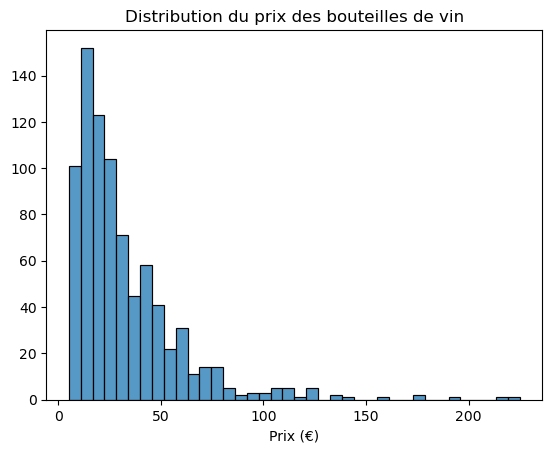

In [71]:
sns.histplot((erp['prix']))
plt.ylabel(None)
plt.xlabel('Prix (€)')
plt.title('Distribution du prix des bouteilles de vin')

### Les mesures de tendance centrale

In [72]:
print("La moyenne de l'échantillon est de", round(erp['prix'].mean(),2),'\n',
"La médiane est de",erp['prix'].median(),'\n',
"Le mode est de",erp['prix'].mode()[0])

La moyenne de l'échantillon est de 32.42 
 La médiane est de 24.4 
 Le mode est de 45.0


On peut voir que ces 3 valeurs sont éloignées, on peut déjà émettre l'hypothèse que la distribution des valeurs de l'échantillon ne suit pas une loi normale.

### Calcul de la moyenne tronquée
Le calcul de la moyenne tronquée se faire en enlevant les outliers de l'échantillon, et plus précisement en retirant 2,5% des valeurs minimales et 2,5% des valeurs maximales.

In [73]:
# Je retire ici 2,5% des valeurs min et max de l'échantillon et je calcule la moyenne
round(st.trim_mean(erp['prix'], 0.05),2)

29.14

La moyenne tronquée est donc de 29.14, cela semble plus juste au regard de la médiane notamment.

### Test des 10% par rapport à la moyenne
On vérifie si la médiane et la moyenne tronquée se situe dans l'intervalle moyenne +/- 10%

In [74]:
print("Voici l'interval moyenne +/- 10% :")
print('[',round(0.9*erp['prix'].mean(),2),',', round(1.1*erp['prix'].mean(),2),']')

Voici l'interval moyenne +/- 10% :
[ 29.17 , 35.66 ]


On peut voir que la médiane et la moyenne tronquée ne sont pas dans cet interval, on en conclue que le test n'est pas passé.

### Les mesures de dispersion

In [115]:
# La variance
round(erp['prix'].var(),2)

718.02

In [118]:
# La variance sans biais
round(erp['prix'].var(ddof=0),2)

717.15

In [77]:
# L'écart type
round(erp['prix'].std(),2)

26.8

In [78]:
# Le coefficient de variation
round(erp['prix'].std()/erp['prix'].mean(),2)

0.83

Ce coefficient de variation est énorme, idéalement, on aime avoir un coefficient de variation inférieur à 0.15, et on considère que la distribution de l'échantillon est trop dispersée si son coefficient de variation est supérieur à 0.30.

### La boxplot, ou boîte à moustaches

Text(0.5, 1.0, 'Boxplot des prix')

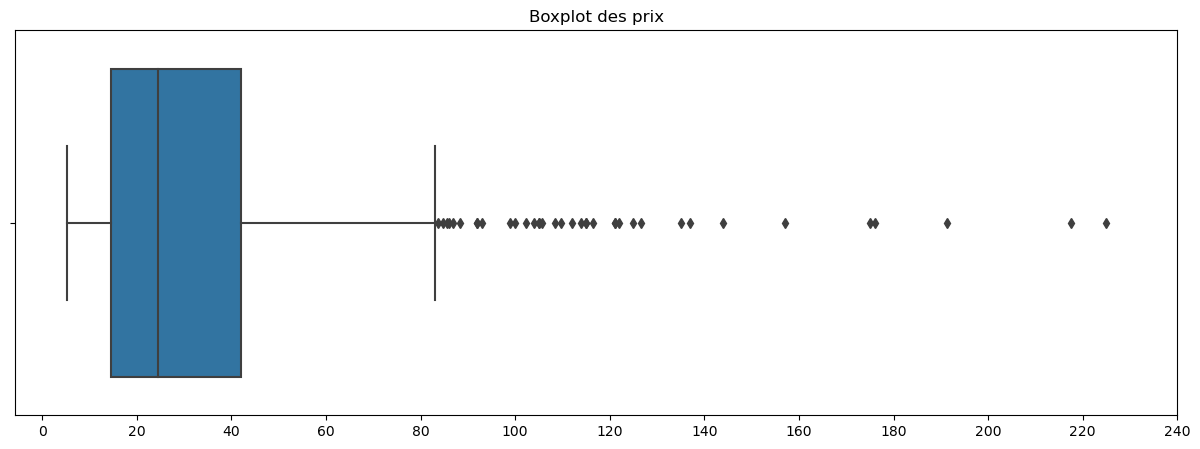

In [79]:
plt.figure(figsize=(15, 5))

sns.boxplot(erp['prix'])
plt.xticks(np.arange(0,250,20))
plt.xlabel(None)
plt.title('Boxplot des prix')

On peut voir que beaucoup de prix sont considérés abberants par la diagramme boite à moustaches, tous les prix supérieur à **Q3 + 1.5 * IQR** soit 83.10€. C'est valeurs extrêmes sont les outliers.

**Notre analyse montre que notre échantillon est très dispersé (test des 10% par rapport à la moyenne, boîte à moustaches et CV=83%).**

**Nous allons tenter de l'améliorer en enlevant les outliers via 2 méthodes : l'IQR et le Zscore.**

### Méthode de l'IQR
**L'IQR est l'écart interquartile, c'est à dire la différence entre le 3e quartile et le premier quartile.
C'est un indicateur robuste sur la distribution d'un échantillon.
La méthode de l'IQR consiste à considérer aberrantes ou atypiques les valeurs de l'échantillon > Q3+(1.5*IQR)**

In [80]:
Q3 = np.quantile(erp['prix'], 0.75)
Q1 = np.quantile(erp['prix'], 0.25)
IQR = Q3-Q1
print(IQR)

27.4


In [81]:
# Valeurs au delà de laquelle les prix sont considérés abberants par la méthode de l'IQR, cela signifie qu'on gardera les prix inférieurs à ce prix là
Q3+(1.5*IQR)

83.1

Dans notre cas, on peut considérer les valeurs atypiques (plutôt que aberrantes) car une bouteille de vin peut coûter plusieurs centaines d'euros.

In [82]:
erp['prix'][erp['prix']<83.1].sort_values()

700     5.2
100     5.7
101     5.7
102     5.7
605     5.7
       ... 
207    79.5
209    79.5
132    79.8
10     80.0
205    83.0
Name: prix, Length: 788, dtype: float64

**Avec la méthode de l'IQR, on garde 788 valeurs, donc on en rejette 37 et la valeur max est de 83€.**

In [83]:
erp['prix'][erp['prix']>83.1].sort_values().count()

37

Voici ces outliers

In [84]:
df_global[df_global['prix']>83.1].head()

,id_produit,vente_web,prix,quantite_stock,status_stock,id_web,total_vente,date_creation,description,CA
19,4055,0,86.1,0,outofstock,NaN,NaN,NaT,NaN,NaN
66,4115,1,100.0,11,instock,15382.0,0.0,2018-02-13 11:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0
68,4132,1,88.4,5,instock,11668.0,0.0,2018-02-13 11:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0
208,4352,1,225.0,0,outofstock,15940.0,5.0,2018-03-02 10:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
210,4355,1,126.5,2,instock,12589.0,11.0,2018-03-02 10:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5


In [85]:
df_global.loc[df_global['prix']>83.1, :]['CA'].sum()

6970.0

In [86]:
round(100*(df_global.loc[df_global['prix']>83.1, :]['CA'].sum())/df_global['CA'].sum(),2)

9.88

Ces outliers représente 6970 € soit 9.88% du CA.

### Méthode du Zscore
**Pour chaque valeurs de l'échantillon, on calculera son zscore, avec zscore = (prix - moyenne)/écart type**

**Si la valeur absolue du zscore est inférieur à 3, on garde notre valeurs en cours, sinon on la rejette de l'échantillon.**

In [87]:
erp['prix'][abs(st.zscore(erp['prix']))<3]

0      24.2
1      34.3
2      20.8
3      14.1
4      46.0
       ... 
820    45.0
821    45.0
822    54.8
823    26.5
824    16.3
Name: prix, Length: 807, dtype: float64

**Ici on garde 807 valeurs, cela signifie qu'on en a rejeté 18. De plus, la valeur maximum est de 112€.**

In [88]:
erp['prix'][abs(st.zscore(erp['prix']))>3].count()

18

### Les mesures de forme

#### Le skewness empirique, mesure d'asymétrie
L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale.

In [89]:
erp['prix'].skew()

2.6227973685638717

On a γ1>0, ce qui veut dire que la distribution est étalée à droite. Cela confirme ce qu'on a vu précédemment.

In [90]:
st.skewtest(erp['prix'])

SkewtestResult(statistic=18.297937831750634, pvalue=8.594075403453784e-75)

**On passe ici un test d'asymétrie par rapport à une distribution normale.
On a ici un pvalue très nettement inférieur à 0.01, cela indique que l'asymétrie de notre échantillon ne suit pas une loi normal.**

#### Le kurtosis empirique,  mesure d'aplatissement

In [91]:
erp['prix'].kurtosis()

10.615358266001198

On a γ2>0, donc la distribution est moins aplatie que la distribution normale :  les observations sont plus concentrées.

In [92]:
st.kurtosistest(erp['prix'])

KurtosistestResult(statistic=12.673377084049374, pvalue=8.306000464519405e-37)

On a ici un pvalue très nettement inférieur à 0.01, cela indique que l'aplanissement de notre échantillon ne suit pas une loi normale.

<a id='test_normal'></a>
## Test de normalités <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>
**Nous allons faire passer des tests de normalité à notre variable.
Nous passerons le test de Test de Kolmogorov-Smirnov puis de Shapiro-Wilk.**

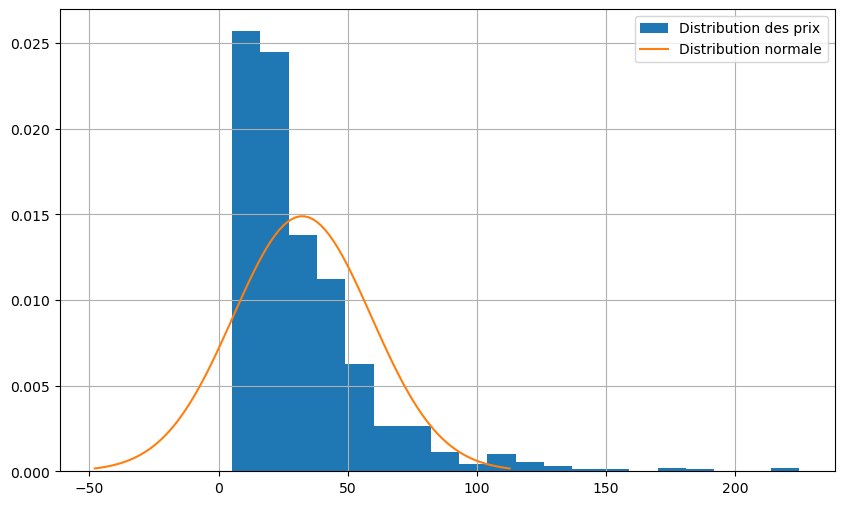

In [93]:
plt.figure(figsize=(10,6))

x=erp['prix']
x.hist(density=True, bins=20, label='Distribution des prix')

mean=np.mean(x)
std=np.std(x)

rvs=np.linspace(mean-3*std, mean+3*std, 100)
pdf = st.norm.pdf(rvs, mean, std)

plt.plot(rvs, pdf, label='Distribution normale')

plt.legend(loc='upper right')

**La distribution des prix ne semble pas suivre une loi normale d'après le graphique, nous allons voir si les tests confirment cela.**

### Test de Kolmogorov-Smirnov

**Le test de Kolmogorov-Smirnov est un test d'hypothèse utilisé pour déterminer si un échantillon suit bien une loi donnée connue par sa fonction de répartition continue (en l'occurence pour nous la loi normale), ou bien si deux échantillons suivent la même loi.**

On va ainsi comparer la distribution de notre échantillon avec la distribution de la loi normale et conclure sur si oui ou non notre échantillon suit une loi normale.

Voici notre test d'hypothèse :
- h0 : notre échantillon suit une loi normale
- h1 : notre échantillon ne suit pas une loi normale

Le test de de Kolmogorov-Smirnov va nous donner 2 résultats : statistic et pvalue

Voici comment interpréter les résulats :
- pvalue =< 0.01 : très forte présomption contre l'hypothèse nulle ;
- 0.01 < p =< 0.05 : forte présomption contre l'hypothèse nulle ;
- 0.05 < p =< 0.1 : faible présomption contre l'hypothèse nulle ;
- 0.1 < p : pas de présomption contre l'hypothèse nulle.

alpha = 1%

In [94]:
x=erp['prix']
results = st.kstest(x, 'norm')
print(results[1])

0.0


**pvalue=0.0 < alpha dans notre cas.
On rejette l'hypothèse h0.
On peut conclure que notre échantillon ne suit pas une loi normale.**

### Test de Shapiro-Wilk

**En statistique, le test de Shapiro–Wilk teste l'hypothèse nulle selon laquelle un échantillon est issu d'une population normalement distribuée (comme le test d'avant).**

alpha=5% cela signifie qu'on pose un risque de 5%

In [95]:
st.shapiro(x)

ShapiroResult(statistic=0.7640294432640076, pvalue=9.484516577227936e-33)

**pvalue=9.48e-33 dans notre cas. 
pvalue<0.01 donc on peut conclure que notre échantillon ne suit pas une loi normale.**

**On va essayer de passer notre échantillon au logarithme ou à la racine pour tenter qu'elle suive une loi normale, on appelle cela une transformation.**

### Passage au logarithme

In [96]:
st.shapiro(np.log(x))

ShapiroResult(statistic=0.9915798902511597, pvalue=0.00012036828411510214)

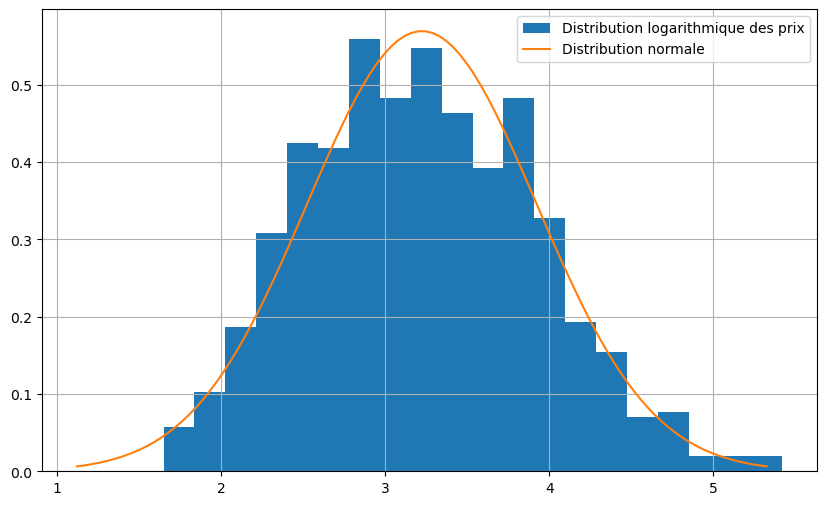

In [97]:
plt.figure(figsize=(10,6))

x=np.log(erp['prix'])
x.hist(density=True, bins=20, label='Distribution logarithmique des prix')

mean=np.mean(x)
std=np.std(x)

rvs=np.linspace(mean-3*std, mean+3*std, 100)
pdf = st.norm.pdf(rvs, mean, std)

plt.plot(rvs, pdf, label='Distribution normale')

plt.legend(loc='upper right')

Le passage au logarithme n'est pas concluant d'après le pvalue, pourtant la distribution semble suivre la loi normale d'après le graphique.

## Tests paramétriques vs non paramétriques
Lorsque l’on réalise des comparaisons de population ou que l’on compare une population à une valeur théorique, il existe deux grandes familles de tests : les tests paramétriques, et les tests non paramétriques.

**Si on conclue que notre échantillon suit une loi normal, on pourra s'orienter vers des tests paramétriques (basés sur la moyenne), dans le cas contraire, on s'orientera vers des tests non paramétriques (basés sur la médiane).**

### Tests paramétriques

Les tests paramétriques fonctionnent en supposant que les données que l’on a à disposition suivent un type de loi de distribution connu (en général la loi normale).

Pour calculer le risque alpha du test statistique, il suffit de calculer la moyenne et l’écart-type de l’échantillon afin d’accéder à la loi de distribution de l’échantillon.

Test paramétrique :
La loi de distribution étant ainsi parfaitement connue, on peut calculer le risque alpha en se basant sur les calculs théoriques de la loi gaussienne.

### Tests non paramétriques

Les tests non paramétriques ne font aucune hypothèse sur le type de loi de distribution des données. Ils se basent uniquement sur les propriétés numériques des échantillons. 

N'ayant pas réussi à normaliser notre échantillon, nous allons utiliser les tests non paramétriques pour notre échantillon.

<a id='synthese'></a>
## Synthèse analyse univariée <a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

**Nous allons voir un tableau de synthèse avec 6 échantillons et les tests de représentativité, de forme et de normalité pour chaque échantillon.**

On fait une synthèse de notre analyse univariée en récapitulant les chiffres expliqués précédemment.
On fera aussi tous ces calculs sur notre échantillon en enlevant les valeurs aberrantes selon la méthode de l'IQR et du zscore.

On passera ensuite notre échantillon au logarithme et à la racine, en l'analysant telle quelle puis en enlevant les valeurs aberrantes avec la méthode de l'IQR et du zscore.

### Création d'un dataframe récapitulatif

In [98]:
# variable échantillon de base + méthode IQR + méthode zscore
var = erp['prix']
var_IQR = var[var<(np.quantile(var, 0.75)+(1.5*(st.iqr(var))))]
var_zscore = var[abs(st.zscore(var))<3]

# transformations au logarithme 
var_log = np.log(var)
log_IQR = var_log[var_log<(np.quantile(var_log, 0.75)+(1.5*(st.iqr(var_log))))]
log_zscore = var_log[abs(st.zscore(var_log))<3]

# transformations à la racine
var_sqrt = np.sqrt(var)
sqrt_IQR = var_sqrt[var_sqrt<(np.quantile(var_sqrt, 0.75)+(1.5*(st.iqr(var_sqrt))))]
sqrt_zscore = var_sqrt[abs(st.zscore(var_sqrt))<3]

# mes 9 échantillons
echantillon = [var, var_IQR, var_zscore, var_log, log_IQR, log_zscore, var_sqrt, sqrt_IQR, sqrt_zscore]

# les colonnes du dataframe correspondant aux 9 échantillons
colonne = ['echantillon_base', 'echantillon_base_IQR', 'echantillon_base_zscore', 
           'echantillon_base_log', 'log_IQR', 'log_zscore',
           'echantillon_base_sqrt', 'sqrt_IQR', 'sqrt_zscore']

# les indicateurs qu'on va calculer pour chaque échantillon
indicateur = ['moyenne', 'moyenne_min', 'moyenne_max', 'test_moyenne_10_pourcents','mediane', 'mode', 'moyenne_tronquee', 
              'ecart_type', 'CV', 'IQR', 'outlier_max_iqr', 'outlier_min_iqr', 'nb_outlier_iqr', 'outlier_max_zscore',
              'outlier_min_zscore', 'nb_outlier_zscore', 'skewness', 'skewness_pvalue', 'kurtosis', 'kurtosis_pvalue',
              'ks_pvalue', 'shapiro_pvalue']

In [99]:
# création du dataframe

liste = []

for x in echantillon :
    moyenne = round(x.mean(),4)
    moyenne_min = round(x.mean()*0.9,4)
    moyenne_max = round(x.mean()*1.1,4)
    mediane = round(x.median(),4)
    mode = round(x.mode()[0],4)
    moyenne_tronquee = round(st.trim_mean(x, 0.05),4)
    if (moyenne_min<mediane<moyenne_max) & (moyenne_min<moyenne_tronquee<moyenne_max) : test_moyenne_10_pourcents = True
    else : test_moyenne_10_pourcents = False
    ecart_type = round(x.std(),4)
    CV = round(x.std()/x.mean(),4)
    IQR = round(np.quantile(x, 0.75) - (np.quantile(x, 0.25)),4)
    outlier_max_iqr = np.quantile(x, 0.75) + 1.5*IQR
    outlier_min_iqr = max(np.quantile(x, 0.25) - 1.5*IQR,0)
    nb_outlier_iqr = x[(x>outlier_max_iqr)|(x<outlier_min_iqr)].count()
    outlier_max_zscore = x[abs(st.zscore(x))<3].max()
    outlier_min_zscore = max(np.mean(x)-3*np.std(x),0)
    nb_outlier_zscore = x[abs(st.zscore(x))>3].count()
    skewness = round(x.skew(),4)
    skewness_pvalue = round(st.skewtest(x)[1],4)
    kurtosis = round(x.kurtosis(),4)
    kurtosis_pvalue = round(st.kurtosistest(x)[1],4)
    ks_pvalue = round(st.kstest(x, 'norm')[1],4)
    shapiro_pvalue = round(st.shapiro(x)[1],4)
    liste1 = [moyenne, moyenne_min, moyenne_max, test_moyenne_10_pourcents, mediane, mode, moyenne_tronquee, 
              ecart_type, CV, IQR, outlier_max_iqr, outlier_min_iqr, nb_outlier_iqr, outlier_max_zscore,
              outlier_min_zscore, nb_outlier_zscore, skewness, skewness_pvalue, 
              kurtosis, kurtosis_pvalue, ks_pvalue, shapiro_pvalue]
    liste.append(liste1) 
    
dictionnaire = {colonne : liste for colonne, liste in zip(colonne, liste)}
df = pd.DataFrame(dictionnaire, index=indicateur)

df

,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,32.4156,28.2565,29.8753,3.2231,3.2178,3.2178,5.3356,5.1799,5.2499
moyenne_min,29.1741,25.4308,26.8878,2.9008,2.896,2.896,4.802,4.6619,4.7249
moyenne_max,35.6572,31.0821,32.8629,3.5454,3.5396,3.5396,5.8692,5.6979,5.7749
test_moyenne_10_pourcents,False,False,False,True,True,True,True,True,True
mediane,24.4,23.4,24.0,3.1946,3.1905,3.1905,4.9396,4.899,4.9092
mode,45.0,45.0,45.0,3.8067,3.8067,3.8067,6.7082,6.7082,6.7082
moyenne_tronquee,29.1416,26.9785,28.0186,3.2104,3.2073,3.2073,5.1866,5.0964,5.1439
ecart_type,26.7958,17.5236,20.2654,0.701,0.6935,0.6935,1.9879,1.7164,1.8183
CV,0.8266,0.6202,0.6783,0.2175,0.2155,0.2155,0.3726,0.3313,0.3464
IQR,27.4,24.725,25.8,1.0566,1.0577,1.0577,2.6597,2.5417,2.5991


In [100]:
min(erp['prix'][abs(st.zscore(erp['prix']))>3].min(),0)

0

D'après ces indicateurs, on peut dire que nos échantillons passés au logarithme sont de meilleurs qualités pour une analyse.
On voit par exemple, qu'il passe le test de la moyenne à 10%, que leur coefficient de variation est acceptable (<30%).

On voit aussi que les échantillons transformés au logarithme ont les meilleurs indicateurs en terme d'asymétrie (skewness_pvalue) et d'aplanissement (kurtosis_pvalue).

Cependant, aucun des échantillons ne passe les tests de Kolmogorov-Smirnov et de Shapiro-Wilk, donc aucun ne suivent une loi normale.

L'inconvenient des transformations est qu'elle sont dures à analyser.

In [101]:
print('Nombre de valeurs aberrantes ou atypiques pour chaque échantillon transformé :')
print('Echantillon de base méthode IQR :',var[var>(np.quantile(var, 0.75)+(1.5*(st.iqr(var))))].count())
print('Echantillon de base méthode zscore :',var[abs(st.zscore(var))>3].count())
print('Echantillon passé au logarithme méthode IQR :',var_log[var_log>(np.quantile(var_log, 0.75)+(1.5*(st.iqr(var_log))))].count())
print('Echantillon passé au logarithme méthode zscore :',var_log[abs(st.zscore(var_log))>3].count())
print('Echantillon passé à la racine méthode IQR :',var_sqrt[var_sqrt>(np.quantile(var_sqrt, 0.75)+(1.5*(st.iqr(var_sqrt))))].count())
print('Echantillon passé à la racine méthode zscore :',var_sqrt[abs(st.zscore(var_sqrt))>3].count())

Nombre de valeurs aberrantes ou atypiques pour chaque échantillon transformé :
Echantillon de base méthode IQR : 37
Echantillon de base méthode zscore : 18
Echantillon passé au logarithme méthode IQR : 2
Echantillon passé au logarithme méthode zscore : 2
Echantillon passé à la racine méthode IQR : 19
Echantillon passé à la racine méthode zscore : 9


### Histogrammes des prix correspondants

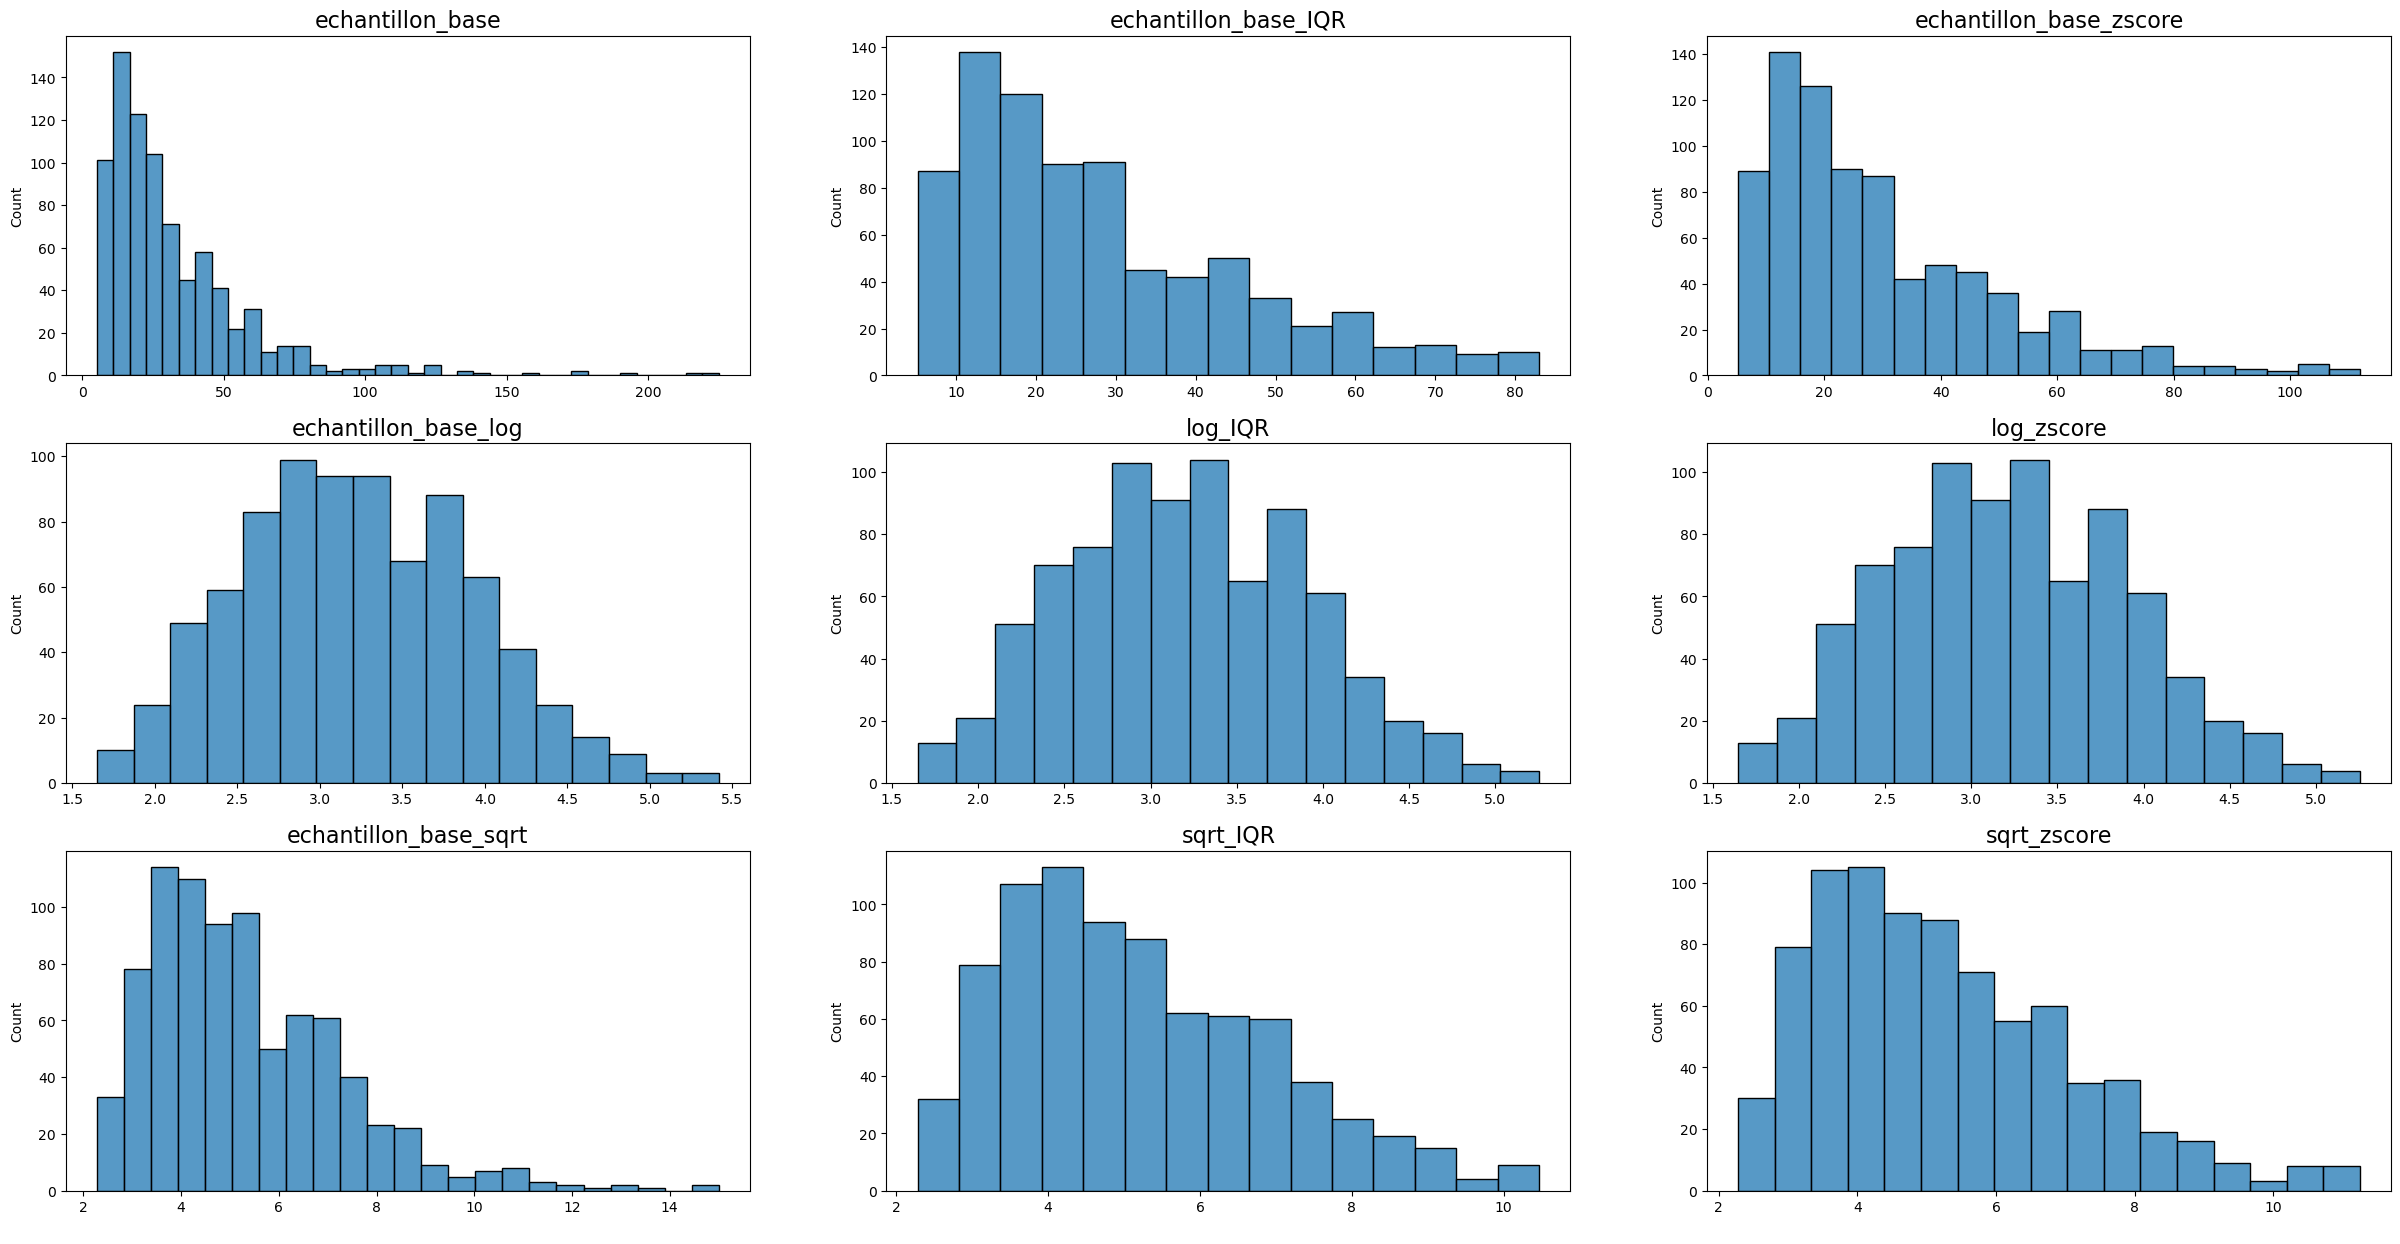

In [102]:
plt.figure(figsize=(30,15))

for x, i, titre in zip(echantillon, range(len(echantillon)), colonne):
    plt.subplot((len(echantillon))//3, (len(echantillon))//3,i+1)
    plt.title(titre, size=16)
    plt.xlabel(' ')
    sns.histplot(x)
    
plt.show()

### Boîtes à moustaches correspondantes sans les valeurs aberrantes

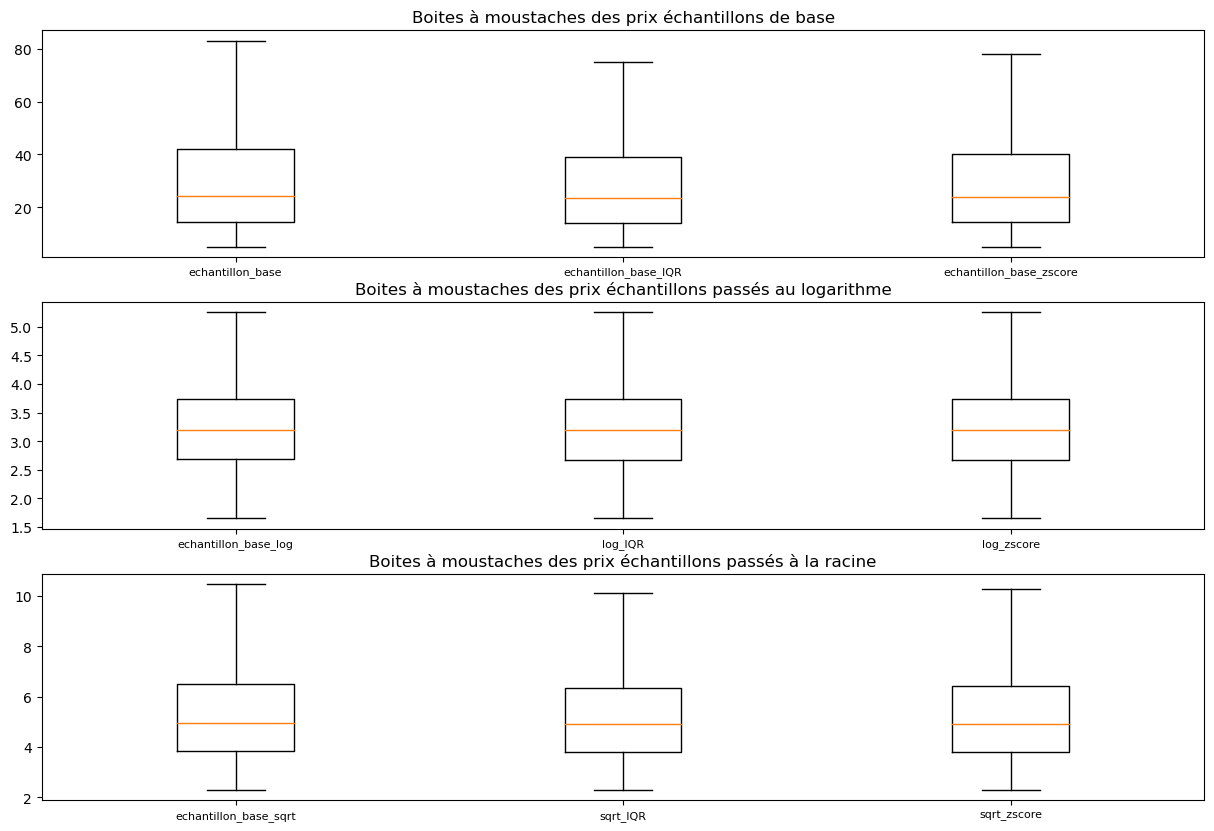

In [103]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.boxplot(echantillon[0:3], showfliers=False)
plt.xticks(range(1, 1+len(echantillon)//3), colonne[0:3], size=8)

plt.title('Boites à moustaches des prix échantillons de base')

plt.subplot(3,1,2)
plt.boxplot(echantillon[3:6], showfliers=False)
plt.xticks(range(1, 1+len(echantillon)//3), colonne[3:6], size=8)

plt.title('Boites à moustaches des prix échantillons passés au logarithme')


plt.subplot(3,1,3)
plt.boxplot(echantillon[6:9], showfliers=False)
plt.xticks(range(1, 1+len(echantillon)//3), colonne[6:9], size=8)

plt.title('Boites à moustaches des prix échantillons passés à la racine')
    
plt.show()

<a id='fonction'></a>
## Création de fonctions pour générer tout cela pour n'importe quelle variable<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

In [104]:
def stat_var(var): 

    # variable échantillon de base + méthode IQR + méthode zscore
    
    var_IQR = var[var<(np.quantile(var, 0.75)+(1.5*(st.iqr(var))))]
    var_zscore = var[abs(st.zscore(var))<3]

    # transformations au logarithme 
    var_log = np.log(var)
    log_IQR = var_log[var_log<(np.quantile(var_log, 0.75)+(1.5*(st.iqr(var_log))))]
    log_zscore = var_log[abs(st.zscore(var_log))<3]

    # transformations à la racine
    var_sqrt = np.sqrt(var)
    sqrt_IQR = var_sqrt[var_sqrt<(np.quantile(var_sqrt, 0.75)+(1.5*(st.iqr(var_sqrt))))]
    sqrt_zscore = var_sqrt[abs(st.zscore(var_sqrt))<3]

    # mes 9 échantillons
    echantillon = [var, var_IQR, var_zscore, var_log, log_IQR, log_zscore, var_sqrt, sqrt_IQR, sqrt_zscore]

    # les colonnes du dataframe correspondant aux 9 échantillons
    colonne = ['echantillon_base', 'echantillon_base_IQR', 'echantillon_base_zscore', 
               'echantillon_base_log', 'log_IQR', 'log_zscore',
               'echantillon_base_sqrt', 'sqrt_IQR', 'sqrt_zscore']

    # les indicateurs qu'on va calculer pour chaque échantillon
    indicateur = ['moyenne', 'moyenne_min', 'moyenne_max', 'test_moyenne_10_pourcents','mediane', 'mode', 'moyenne_tronquee', 
                  'ecart_type', 'CV', 'IQR', 'outlier_max_iqr', 'outlier_min_iqr', 'nb_outlier_iqr', 'outlier_max_zscore',
                  'outlier_min_zscore', 'nb_outlier_zscore', 'skewness', 'skewness_pvalue', 'kurtosis', 'kurtosis_pvalue',
                  'ks_pvalue', 'shapiro_pvalue']
    
    
    # création du dataframe

    liste = []

    for x in echantillon :
        moyenne = round(x.mean(),4)
        moyenne_min = round(x.mean()*0.9,4)
        moyenne_max = round(x.mean()*1.1,4)
        mediane = round(x.median(),4)
        mode = round(x.mode()[0],4)
        moyenne_tronquee = round(st.trim_mean(x, 0.05),4)
        if (moyenne_min<mediane<moyenne_max) & (moyenne_min<moyenne_tronquee<moyenne_max) : test_moyenne_10_pourcents = True
        else : test_moyenne_10_pourcents = False
        ecart_type = round(x.std(),4)
        CV = round(x.std()/x.mean(),4)
        IQR = round(np.quantile(x, 0.75) - (np.quantile(x, 0.25)),4)
        outlier_max_iqr = np.quantile(x, 0.75) + 1.5*IQR
        outlier_min_iqr = max(np.quantile(x, 0.25) - 1.5*IQR,0)
        nb_outlier_iqr = x[(x>outlier_max_iqr)|(x<outlier_min_iqr)].count()
        outlier_max_zscore = x[abs(st.zscore(x))<3].max()
        outlier_min_zscore = max(np.mean(x)-3*np.std(x),0)
        nb_outlier_zscore = x[abs(st.zscore(x))>3].count()
        skewness = round(x.skew(),4)
        skewness_pvalue = round(st.skewtest(x)[1],4)
        kurtosis = round(x.kurtosis(),4)
        kurtosis_pvalue = round(st.kurtosistest(x)[1],4)
        ks_pvalue = round(st.kstest(x, 'norm')[1],4)
        shapiro_pvalue = round(st.shapiro(x)[1],4)
        liste1 = [moyenne, moyenne_min, moyenne_max, test_moyenne_10_pourcents, mediane, mode, moyenne_tronquee, 
                  ecart_type, CV, IQR, outlier_max_iqr, outlier_min_iqr, nb_outlier_iqr, outlier_max_zscore,
                  outlier_min_zscore, nb_outlier_zscore, skewness, skewness_pvalue, 
                  kurtosis, kurtosis_pvalue, ks_pvalue, shapiro_pvalue]
        liste.append(liste1) 

    dictionnaire = {colonne : liste for colonne, liste in zip(colonne, liste)}
    df = pd.DataFrame(dictionnaire, index=indicateur)

    df
    
    return df

In [110]:
stat_var(erp['prix'])

,echantillon_base,echantillon_base_IQR,echantillon_base_zscore,echantillon_base_log,log_IQR,log_zscore,echantillon_base_sqrt,sqrt_IQR,sqrt_zscore
moyenne,32.4156,28.2565,29.8753,3.2231,3.2178,3.2178,5.3356,5.1799,5.2499
moyenne_min,29.1741,25.4308,26.8878,2.9008,2.896,2.896,4.802,4.6619,4.7249
moyenne_max,35.6572,31.0821,32.8629,3.5454,3.5396,3.5396,5.8692,5.6979,5.7749
test_moyenne_10_pourcents,False,False,False,True,True,True,True,True,True
mediane,24.4,23.4,24.0,3.1946,3.1905,3.1905,4.9396,4.899,4.9092
mode,45.0,45.0,45.0,3.8067,3.8067,3.8067,6.7082,6.7082,6.7082
moyenne_tronquee,29.1416,26.9785,28.0186,3.2104,3.2073,3.2073,5.1866,5.0964,5.1439
ecart_type,26.7958,17.5236,20.2654,0.701,0.6935,0.6935,1.9879,1.7164,1.8183
CV,0.8266,0.6202,0.6783,0.2175,0.2155,0.2155,0.3726,0.3313,0.3464
IQR,27.4,24.725,25.8,1.0566,1.0577,1.0577,2.6597,2.5417,2.5991


In [111]:
def hist_var(var) : 

    # variable échantillon de base + méthode IQR + méthode zscore
    
    var_IQR = var[var<(np.quantile(var, 0.75)+(1.5*(st.iqr(var))))]
    var_zscore = var[abs(st.zscore(var))<3]

    # transformations au logarithme 
    var_log = np.log(var)
    log_IQR = var_log[var_log<(np.quantile(var_log, 0.75)+(1.5*(st.iqr(var_log))))]
    log_zscore = var_log[abs(st.zscore(var_log))<3]

    # transformations à la racine
    var_sqrt = np.sqrt(var)
    sqrt_IQR = var_sqrt[var_sqrt<(np.quantile(var_sqrt, 0.75)+(1.5*(st.iqr(var_sqrt))))]
    sqrt_zscore = var_sqrt[abs(st.zscore(var_sqrt))<3]

    # mes 9 échantillons
    echantillon = [var, var_IQR, var_zscore, var_log, log_IQR, log_zscore, var_sqrt, sqrt_IQR, sqrt_zscore]

    # les colonnes du dataframe correspondant aux 9 échantillons
    colonne = ['echantillon_base', 'echantillon_base_IQR', 'echantillon_base_zscore', 
               'echantillon_base_log', 'log_IQR', 'log_zscore',
               'echantillon_base_sqrt', 'sqrt_IQR', 'sqrt_zscore']

    # les indicateurs qu'on va calculer pour chaque échantillon
    indicateur = ['moyenne', 'moyenne_min', 'moyenne_max', 'test_moyenne_10_pourcents','mediane', 'mode', 'moyenne_tronquee', 
                  'ecart_type', 'CV', 'IQR', 'outlier_max_iqr', 'outlier_min_iqr', 'nb_outlier_iqr', 'outlier_max_zscore',
                  'outlier_min_zscore', 'nb_outlier_zscore', 'skewness', 'skewness_pvalue', 'kurtosis', 'kurtosis_pvalue',
                  'ks_pvalue', 'shapiro_pvalue']
    
    plt.figure(figsize=(30,15))

    for x, i, titre in zip(echantillon, range(len(echantillon)), colonne):
        plt.subplot((len(echantillon))//3, (len(echantillon))//3,i+1)
        plt.title(titre, size=16)
        plt.xlabel(' ')
        sns.histplot(x)
    
    
    return(plt.show())

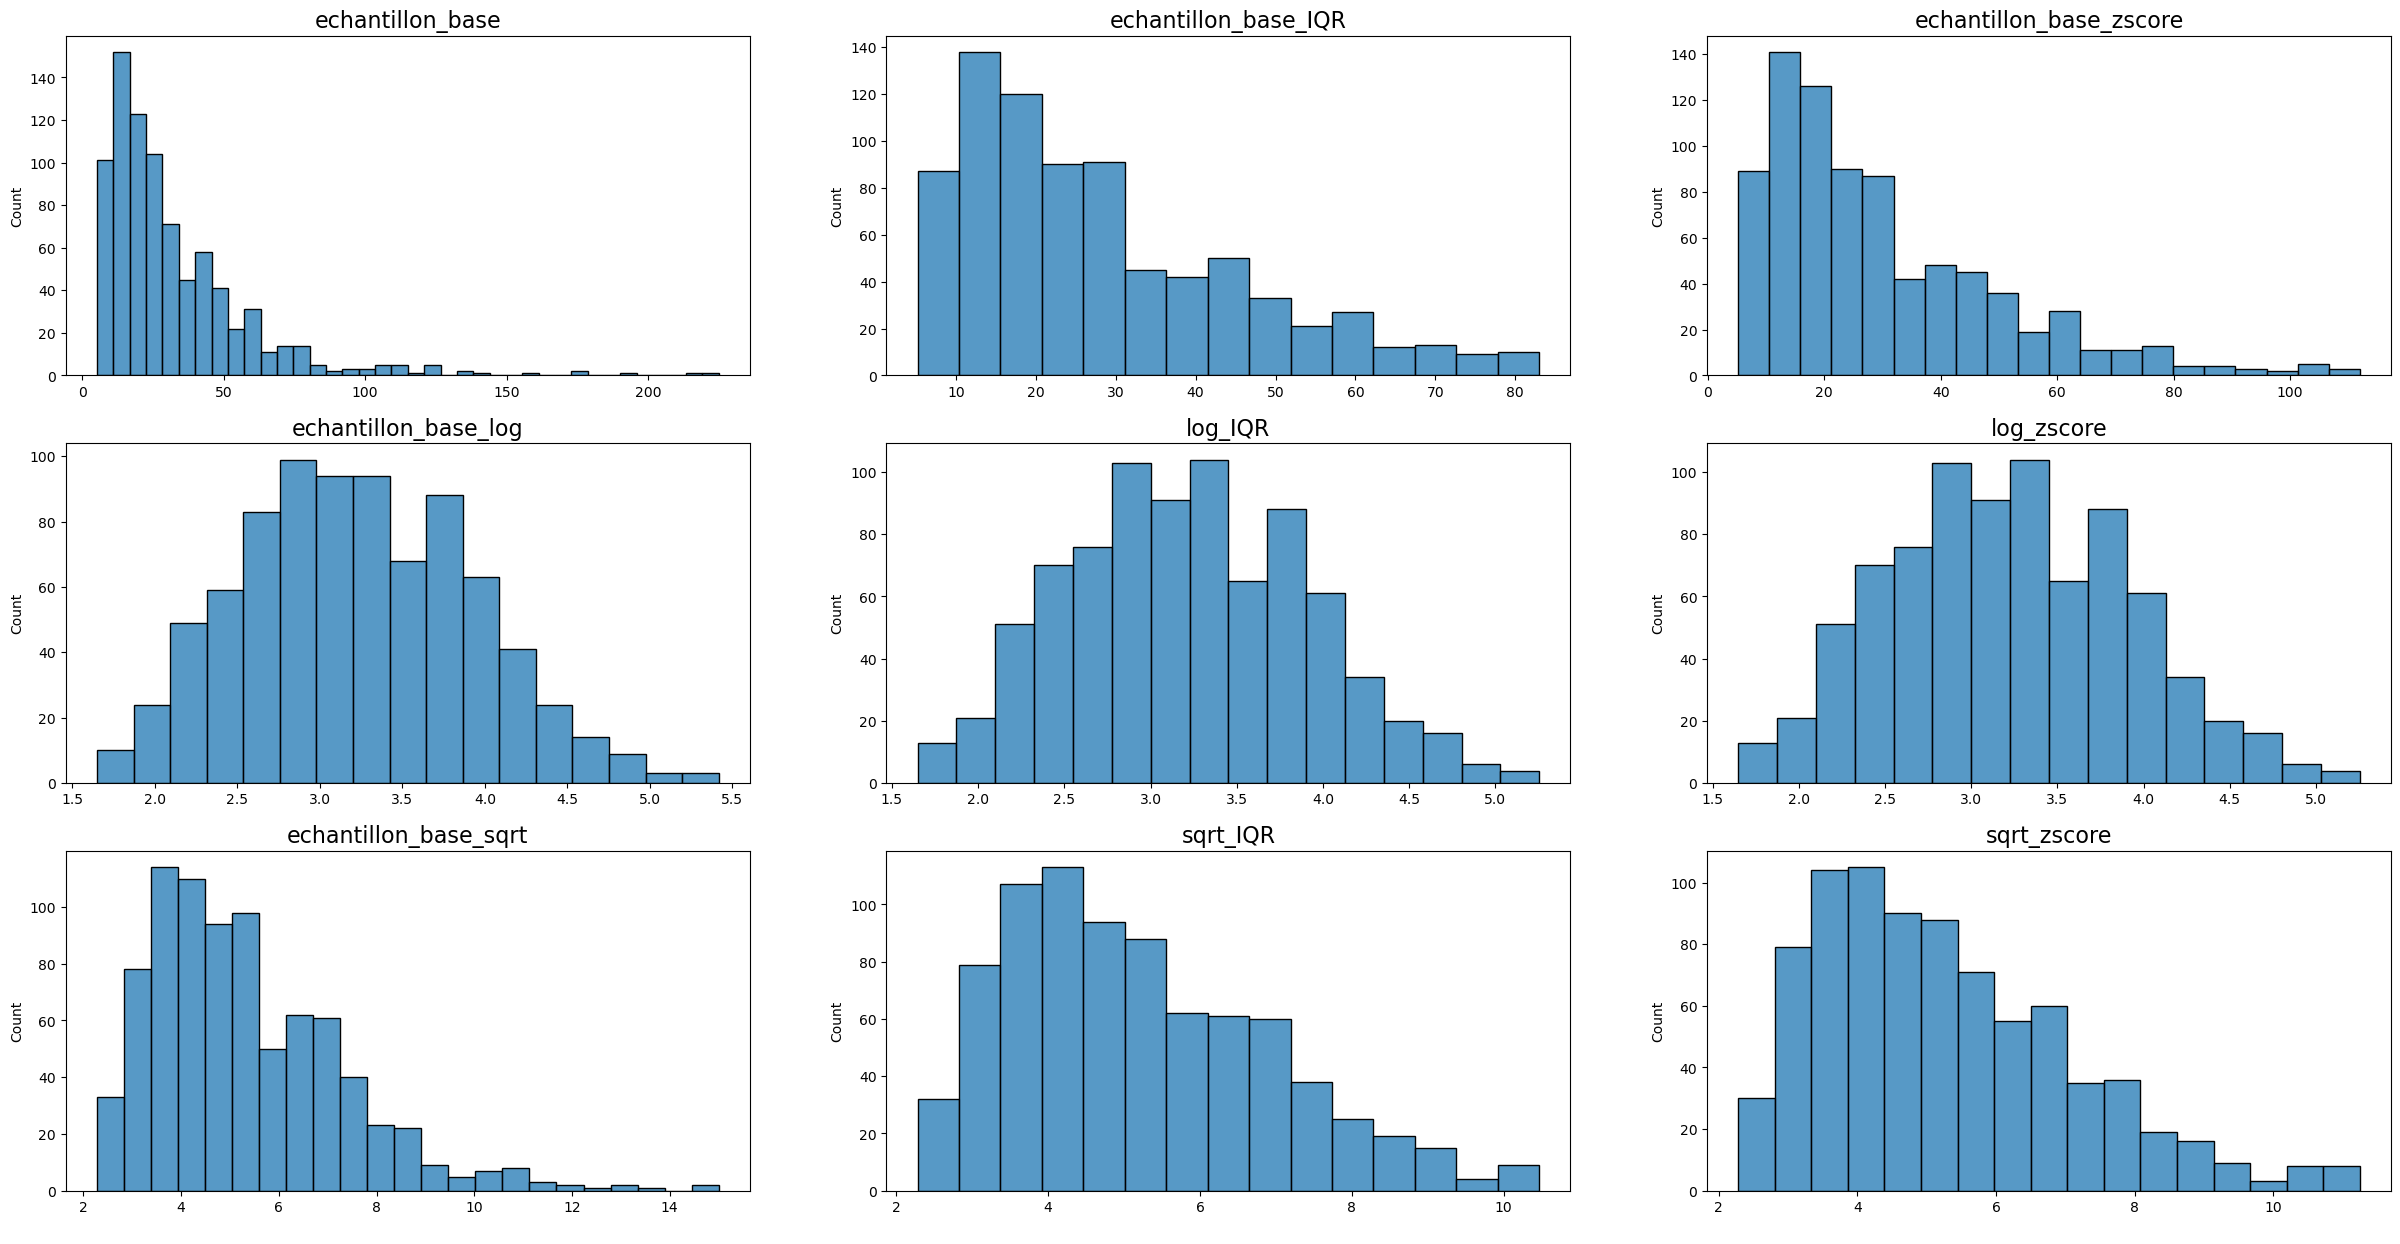

In [112]:
hist_var(erp['prix'])

In [113]:
def boxplot_var(var):
    
    # variable échantillon de base + méthode IQR + méthode zscore
    
    var_IQR = var[var<(np.quantile(var, 0.75)+(1.5*(st.iqr(var))))]
    var_zscore = var[abs(st.zscore(var))<3]

    # transformations au logarithme 
    var_log = np.log(var)
    log_IQR = var_log[var_log<(np.quantile(var_log, 0.75)+(1.5*(st.iqr(var_log))))]
    log_zscore = var_log[abs(st.zscore(var_log))<3]

    # transformations à la racine
    var_sqrt = np.sqrt(var)
    sqrt_IQR = var_sqrt[var_sqrt<(np.quantile(var_sqrt, 0.75)+(1.5*(st.iqr(var_sqrt))))]
    sqrt_zscore = var_sqrt[abs(st.zscore(var_sqrt))<3]

    # mes 9 échantillons
    echantillon = [var, var_IQR, var_zscore, var_log, log_IQR, log_zscore, var_sqrt, sqrt_IQR, sqrt_zscore]

    # les colonnes du dataframe correspondant aux 9 échantillons
    colonne = ['echantillon_base', 'echantillon_base_IQR', 'echantillon_base_zscore', 
               'echantillon_base_log', 'log_IQR', 'log_zscore',
               'echantillon_base_sqrt', 'sqrt_IQR', 'sqrt_zscore']

    # les indicateurs qu'on va calculer pour chaque échantillon
    indicateur = ['moyenne', 'moyenne_min', 'moyenne_max', 'test_moyenne_10_pourcents','mediane', 'mode', 'moyenne_tronquee', 
                  'ecart_type', 'CV', 'IQR', 'outlier_max_iqr', 'outlier_min_iqr', 'nb_outlier_iqr', 'outlier_max_zscore',
                  'outlier_min_zscore', 'nb_outlier_zscore', 'skewness', 'skewness_pvalue', 'kurtosis', 'kurtosis_pvalue',
                  'ks_pvalue', 'shapiro_pvalue']
    
    
    plt.figure(figsize=(15,10))

    plt.subplot(3,1,1)
    plt.boxplot(echantillon[0:3], showfliers=False)
    plt.xticks(range(1, 1+len(echantillon)//3), colonne[0:3], size=8)

    plt.title('Boites à moustaches des prix échantillons de base')

    plt.subplot(3,1,2)
    plt.boxplot(echantillon[3:6], showfliers=False)
    plt.xticks(range(1, 1+len(echantillon)//3), colonne[3:6], size=8)

    plt.title('Boites à moustaches des prix échantillons passés au logarithme')


    plt.subplot(3,1,3)
    plt.boxplot(echantillon[6:9], showfliers=False)
    plt.xticks(range(1, 1+len(echantillon)//3), colonne[6:9], size=8)

    plt.title('Boites à moustaches des prix échantillons passés à la racine')
    


    return(plt.show())

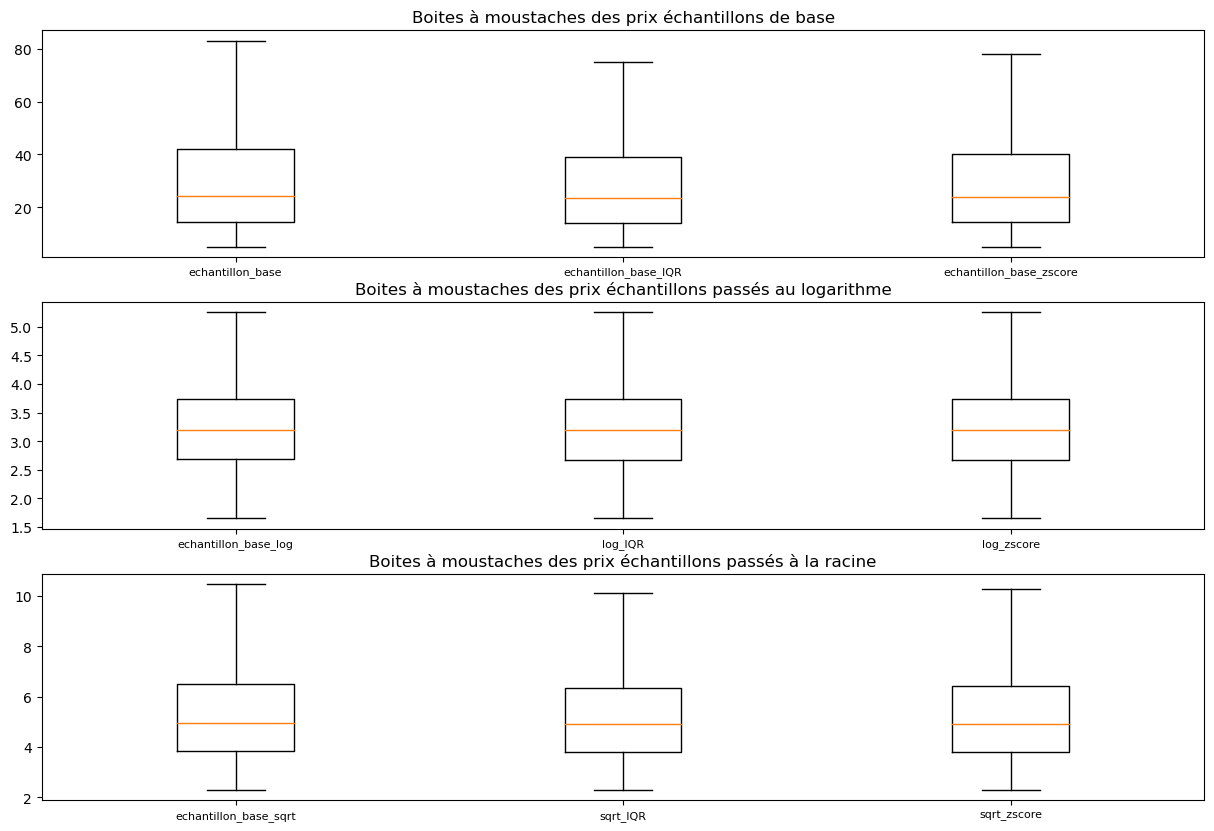

In [114]:
boxplot_var(erp['prix'])

<a id='conclusion'></a>
## Bilan analyse univariée et conclusion<a href="#sommaire" style="font-size : 10px ; padding-left:10px">Retour Sommaire</a>

L'analyse univariée consiste à faire une analyse sur une variable à la fois, à calculer différents indicateurs pour évaluer la qualité de l'échantillon de cette variable.

La qualité de cet échantillon pourra directement influer sur la qualité de l'analyse qu'on fera ensuite.

Voici les étapes principales de l'analyse univariée :

- Les tests de représentativité : calcul de la moyenne, de la moyenne tronquée, de la médiane, du coefficient de variation (<30%) et du test des 10% (médiane et moyenne tronquée comprise +/-10% de la moyenne).

- Les tests sur la forme de notre échantillon (skewness et kurtosis), on préferera une forme qui suit une loi normale.

- Les tests de normalités : Kolmogorov-Smirnov et Shapiro-Wilk, si l'échantillon passe tous ces tests, on considére qu'il est de très bonne qualité et on peut procéder à des tests paramétriques.

Si l'échantillon ne passe pas ces tests, on peut procéder à des transformations (logarithme, racine...) et refaire les tests. Cependant, ces transformations sont pertinentes pour des modèles de prévision mais sont plus compliqués pour des modèles d'explication (ex: nos prix au logarithme sont plus dures à analyser).

Pour synthétiser simplement, voici les indicateurs les plus importants concernant notre échantillon des prix de nos bouteilles de vin :
- La moyenne : 32.42
- La médiane : 24.4
- La moyenne tronquée (5%) : 29.14
- Le test des 10% n'est pas passé (médiane et moyenne tronquée comprise +/-10% de la moyenne)
- Le coefficient de variation est de 83%, cela signifie que l'échantillon est très dispersé (>>30%)
- L'échantillon ne suit pas une loi normal (skewness, kurtosis, Kolmogorov-Smirnov, Shapiro-Wilk)
- 37 valeurs atypiques avec la méthode de l'IQR avec comme valeur max 83€
- 18 valeurs considérés atypiques avec la méthode du zscore avec comme valeur max 112€